<a href="https://colab.research.google.com/github/goktuggokmen/Regression-Algorithms/blob/main/Uygulama_7_Regresyon_Algoritmalar%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EEM 314 Veri Madenciliğine Giriş**
# **Uygulama 7 : Regresyon Algoritmaları**

# **1. Kütüphanelerin Yüklenmesi**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# **2. Verinin Dosyadan Okunması**

In [ ]:
data = pd.read_csv('/content/Real estate.csv')

In [ ]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


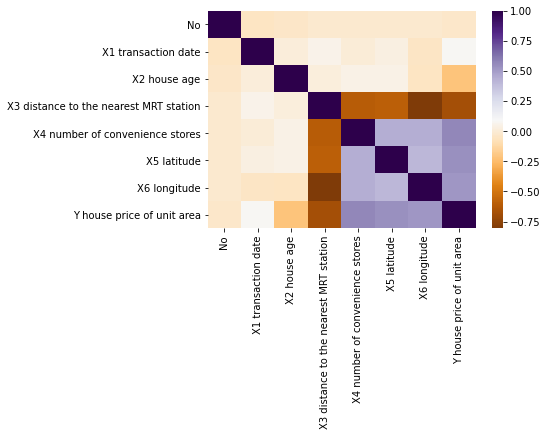

In [ ]:
#korelasyon matrisi
corr_matrix=data.corr()
sns.heatmap(corr_matrix, cmap='PuOr')

# **3. Regresyon Algoritmaları Ve Algoritmaların Başarımlarının Karşılaştırılması**

***Karşılaştırma Metrikleri:***

**[MAE] Ortalama Mutlak Hata (Mean Absolute Error):**

Ortalama mutlak hata, mutlak hata değerinin toplamını alır, hata terimlerinin toplamının daha doğrudan bir temsilidir. MAE, her gerçek değer ile veriye en iyi uyan çizgi arasındaki ortalama dikey mesafedir. MAE aynı zamanda her veri noktası ile en iyi uyan çizgi arasındaki ortalama yatay mesafedir. MAE değeri kolay yorumlanabilir olduğu için regresyon ve zaman serisi problemlerinde sıkça kullanılmaktadır. MAE, yönlerini dikkate almadan bir dizi tahmindeki hataların ortalama büyüklüğünü ölçen, tüm tekil hataların ortalamada eşit olarak ağırlıklandırıldığı doğrusal bir skordur. MAE değeri 0’dan ∞’a kadar değişebilir. Negatif yönelimli puanlar yani daha düşük değerlere sahip tahminleyiciler daha iyi performans gösterir.


* $MAE = \frac{1}{n}\sum_{j=1}^n |e_j|$

**[MSE] Ortalama Kare Hata  (Mean Squared Error):**

Basitçe, ortalama kare hata bir regresyon eğrisinin bir dizi noktaya ne kadar yakın olduğunu söyler. MSE, bir makine öğrenmesi modelinin, tahminleyicinin performansını ölçer, her zaman pozitif değerlidir ve MSE değeri sıfıra yakın olan tahminleyicilerin daha iyi bir performans gösterdiği söylenebilir.


* $MSE = \frac{1}{n}\sum_{j=1}^n {e_j^2}$


---


[KAYNAK](https://veribilimcisi.com/2017/07/14/mse-rmse-mae-mape-metrikleri-nedir/#:~:text=%5BMSE%5D%20Ortalama%20Kare%20Hata%20(Mean%20Squared%20Error)%3A&text=MSE%2C%20bir%20makine%20%C3%B6%C4%9Frenmesi%20modelinin,iyi%20bir%20performans%20g%C3%B6sterdi%C4%9Fi%20s%C3%B6ylenebilir.)

In [ ]:
#algoritmaları oluşturabilmek için veriyi bir takım işlemden geçiriyoruz 
x = data.iloc[:, 2:7] #bağımsız değişkenler (etiket değerinin oluşmasında etkisi olan,anlamlı kolonlar seçilmiştir)
y = data.iloc[:, [7]] #etiket değeri

In [ ]:
x #bağımsız değişkenler

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [ ]:
y #etiket değeri

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [ ]:
print('Tahminleyeceğimiz kolonun min. değeri :', y.min().values)

Tahminleyeceğimiz kolonun min. değeri : [7.6]


In [ ]:
print('Tahminleyeceğimiz kolonun max. değeri :', y.max().values)

Tahminleyeceğimiz kolonun max. değeri : [117.5]


In [ ]:
print('Tahminleyeceğimiz kolonun ortalama değeri :', y.mean().values)

Tahminleyeceğimiz kolonun ortalama değeri : [37.98019324]


In [ ]:
print('Tahminleyeceğimiz kolonun standart sapması :', y.std().values)

Tahminleyeceğimiz kolonun standart sapması : [13.6064877]


In [ ]:
#test verisi oluşturma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0) #datamızın 1/3 ünü test datası olarak oluşturuyoruz 

> **3.1. Linear Regression**

In [ ]:
#Linear Regression modelini oluşturma
model1 = LinearRegression()
#modeli eğitme
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#test datasıyla modelimize tahmin ürettirelim
prediction1 = model1.predict(X_test)
print(prediction1)

[[42.27600107]
 [11.88066953]
 [41.56323145]
 [11.71389715]
 [41.22627523]
 [40.26059891]
 [40.02036918]
 [34.63991015]
 [48.49462488]
 [45.19472862]
 [45.4240369 ]
 [40.77337368]
 [41.65817386]
 [40.32365312]
 [49.25897325]
 [36.5215321 ]
 [40.12781428]
 [43.27049511]
 [42.12667539]
 [43.89597295]
 [52.48789974]
 [30.82528604]
 [41.94530052]
 [46.63221653]
 [47.96970752]
 [44.72447721]
 [45.18577598]
 [28.86248024]
 [48.3692493 ]
 [23.33152582]
 [42.824074  ]
 [33.40495362]
 [44.9396335 ]
 [37.00043332]
 [45.32028957]
 [30.7714806 ]
 [48.01512478]
 [39.48757903]
 [54.45662565]
 [ 9.63887061]
 [51.3915881 ]
 [34.8101701 ]
 [36.2878922 ]
 [48.31735401]
 [14.17071098]
 [42.51895914]
 [44.99436828]
 [14.77976627]
 [32.97850517]
 [46.48132839]
 [52.272678  ]
 [41.6785042 ]
 [49.4607476 ]
 [24.51652622]
 [30.85218876]
 [36.09743177]
 [49.21404858]
 [40.94679191]
 [45.53164777]
 [33.51256449]
 [42.586153  ]
 [42.5649267 ]
 [40.51298058]
 [48.65604119]
 [39.23183528]
 [30.17424723]
 [12.05956

In [ ]:
print('Oluşturduğumuz modelin min. değeri :', prediction1.min())

Oluşturduğumuz modelin min. değeri : 7.614379174116948


In [ ]:
print('Oluşturduğumuz modelin max. değeri :', prediction1.max())

Tahminleyeceğimiz kolonun max. değeri : 54.45662565008024


In [ ]:
print('Oluşturduğumuz modelin ortalama değeri :', prediction1.mean())

Tahminleyeceğimiz kolonun ortalama değeri : 38.56440112591204


In [ ]:
print('Oluşturduğumuz modelin standart sapması :', prediction1.std())

Oluşturduğumuz modelin standart sapması : 10.270305405172293


In [ ]:
print('Modelin Başarısı:', model1.score(x,y)) 

Modelin Başarısı: 0.5694838529007007


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction1))  

Mean Absolute Error: 6.129313170612806


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction1))  

Mean Squared Error: 72.4153035092044


> **3.2. Extra Trees Regressor**

In [ ]:
#Extra Tress Regressor modelini oluşturma
model2 = ExtraTreesRegressor()
#modeli eğitme
model2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
#test datasıyla modelimize tahmin ürettirelim
prediction2 = model2.predict(X_test)
print(prediction2)

[82.6575     17.595      40.469      21.632      29.1        38.84266667
 44.121      36.7        48.671      46.71       42.1115     32.7895
 42.423      44.3725     62.9358     45.927      36.52966667 48.85
 42.428      40.453      56.463      28.9        36.5595     49.67266667
 55.3296     43.688      44.54266667 25.466      51.998      21.996
 38.75133333 22.923      47.85       37.994      44.34733333 28.8355
 45.636      21.72       55.8415     11.751      50.8        37.611
 27.7165     43.82       15.614      39.737      38.083      14.39
 26.104      53.303      60.1195     34.445      44.083      18.52
 28.9        36.53316667 55.         35.674      42.277      22.972
 37.644      57.267      41.6365     48.1805     40.40133333 26.839
 21.809      22.879      58.415      38.84266667 22.41       52.214
 44.339      25.44       38.175      29.55       27.8015     17.991
 46.1        37.773      48.124      27.8135     37.60866667 24.384
 27.8785     36.796      39.82083333 32

In [ ]:
print('Oluşturduğumuz modelin min. değeri :', prediction2.min())

Oluşturduğumuz modelin min. değeri : 11.751000000000023


In [ ]:
print('Oluşturduğumuz modelin max. değeri :', prediction2.max())

Oluşturduğumuz modelin max. değeri : 82.65750000000006


In [ ]:
print('Oluşturduğumuz modelin ortalama değeri :', prediction2.mean())

Oluşturduğumuz modelin ortalama değeri : 38.11839951690821


In [ ]:
print('Oluşturduğumuz modelin standart sapması :', prediction2.std())

Oluşturduğumuz modelin standart sapması : 12.065833497929525


In [ ]:
print('Modelin Başarısı:', model2.score(x,y)) 

Modelin Başarısı: 0.871277487793394


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction2))  

Mean Absolute Error: 5.3089236714975865


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction2))  

Mean Squared Error: 67.95522383666666


> **3.3. Ada Boost Regressor**

In [ ]:
#AdaBoost Regressor modelini oluşturma
model3 = AdaBoostRegressor()
#modeli eğitme
model3.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [ ]:
#test datasıyla modelimize tahmin ürettirelim
prediction3 = model3.predict(X_test)
print(prediction3)

[44.26826347 21.58       46.25104167 21.58       38.88421053 42.27734375
 48.50461538 37.88076923 57.61204819 44.58       48.3744186  37.09189189
 38.88421053 43.57575758 57.61204819 49.02686567 40.71860465 45.23421053
 41.30428571 44.84670659 53.91428571 25.65714286 39.21452991 50.04931507
 50.04931507 41.30428571 40.71860465 25.09090909 50.04931507 26.70857143
 37.88076923 30.67910448 51.41111111 46.25104167 40.71860465 25.65714286
 48.3744186  30.435      50.88854167 23.22564103 45.23421053 42.15089286
 25.65714286 48.3744186  21.86578947 38.49512195 44.15048544 22.01842105
 25.65714286 44.40645161 53.91428571 44.58       44.58       23.37291667
 25.65714286 40.71860465 50.77865169 42.14782609 48.3744186  30.67910448
 44.58       57.26       37.88076923 56.21351351 43.57575758 25.09090909
 21.58       28.69565217 50.77865169 42.27734375 28.05142857 50.04931507
 50.04931507 25.1575     44.58       25.65714286 25.65714286 22.01842105
 50.04931507 36.5137931  50.31866667 25.65714286 44

In [ ]:
print('Oluşturduğumuz modelin min. değeri :', prediction3.min())

Oluşturduğumuz modelin min. değeri : 21.58


In [ ]:
print('Oluşturduğumuz modelin max. değeri :', prediction3.max())

Oluşturduğumuz modelin max. değeri : 57.612048192771105


In [ ]:
print('Oluşturduğumuz modelin ortalama değeri :', prediction3.mean())

Oluşturduğumuz modelin ortalama değeri : 38.87107333543173


In [ ]:
print('Oluşturduğumuz modelin standart sapması :', prediction3.std())

Oluşturduğumuz modelin standart sapması : 10.162830124251352


In [ ]:
print('Modelin Başarısı:', model3.score(x,y)) 

Modelin Başarısı: 0.766922125067489


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction3))  

Mean Absolute Error: 5.57084560664466


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction3))  

Mean Squared Error: 62.21563826809904


> **3.4. Bagging Regressor**

In [ ]:
#Bagging Regressor modelini oluşturma
model4 = BaggingRegressor()
#modeli eğitme
model4.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [ ]:
#test datasıyla modelimize tahmin ürettirelim
prediction4 = model4.predict(X_test)
print(prediction4)

[82.09333333 18.05       38.61       18.47       39.05       40.8
 40.26       35.4        63.4        48.88       40.08733333 27.56
 43.46333333 41.26       59.21       48.24       37.94       46.91833333
 41.00333333 40.01       56.48       26.59       35.99       50.59504762
 56.3825     42.2875     44.66       24.7025     52.71       20.79
 41.16166667 29.34       50.7465     35.55       44.865      26.59
 45.86       23.41       53.16666667 16.39       52.12458333 35.92
 29.46       44.72       16.82       45.17       39.3        14.27
 27.025      54.2        59.973      40.81       45.16       16.77
 26.59       35.11       54.88       36.73       43.07       29.34
 40.81       58.51       47.57       49.59       38.98       27.28
 20.04       22.48       55.91       40.8        23.28       50.86
 40.47       25.45       42.34       29.72666667 27.7        16.06
 47.12       37.12       46.95       27.04166667 40.58       24.99
 28.58       35.78       40.45       32.83       49

In [ ]:
print('Oluşturduğumuz modelin min. değeri :', prediction4.min())

Oluşturduğumuz modelin min. değeri : 13.929999999999998


In [ ]:
print('Oluşturduğumuz modelin max. değeri :', prediction4.max())

Oluşturduğumuz modelin max. değeri : 82.09333333333333


In [ ]:
print('Oluşturduğumuz modelin ortalama değeri :', prediction4.mean())

Oluşturduğumuz modelin ortalama değeri : 38.35772196342305


In [ ]:
print('Oluşturduğumuz modelin standart sapması :', prediction4.std())

Oluşturduğumuz modelin standart sapması : 12.216765634058408


In [ ]:
print('Modelin Başarısı:', model4.score(x,y)) 

Modelin Başarısı: 0.8239321984224559


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction4))  

Mean Absolute Error: 5.47242417184265


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction4))  

Mean Squared Error: 74.95408441017716


> **3.5. Random Forest Regressor**

In [ ]:
#Random Forest Regressor modelini oluşturma
model5 = RandomForestRegressor()
#modeli eğitme
model5.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#test datasıyla modelimize tahmin ürettirelim
prediction5 = model5.predict(X_test)
print(prediction5)

[73.89486667 18.269      42.5245     20.685      32.05373333 40.909
 41.344      36.488      51.73447143 46.37116667 42.35266667 29.34756667
 35.3228     42.46866667 60.21756429 43.86       37.735      48.74653333
 40.689      40.487      57.096      27.98793333 35.602      50.42219444
 53.81657143 43.98483333 44.4615     23.8465     52.272      22.826
 40.03318333 27.612      54.968625   39.837      44.3681     27.98793333
 46.971      25.1335     55.04823333 14.911      51.21442857 35.854
 28.33       46.10666667 16.295      43.58691667 39.387      14.045
 24.43275    53.06933333 60.62305    36.839      43.9835     18.98933333
 27.98793333 37.19       55.168      37.03533333 43.418      27.723
 38.221      57.992      38.55005    51.37347143 40.89966667 26.924
 21.216      21.3535     55.812      40.909      23.916      51.741
 42.121      24.504      40.2225     29.71280714 27.63083333 17.814
 46.98213333 36.07       49.3425     27.21833333 39.436      25.224
 28.93926667 36.533    

In [ ]:
print('Oluşturduğumuz modelin min. değeri :', prediction5.min())

Oluşturduğumuz modelin min. değeri : 14.044999999999995


In [ ]:
print('Oluşturduğumuz modelin max. değeri :', prediction5.max())

Oluşturduğumuz modelin max. değeri : 73.8948666666667


In [ ]:
print('Oluşturduğumuz modelin ortalama değeri :', prediction5.mean())

Oluşturduğumuz modelin ortalama değeri : 38.144812537382094


In [ ]:
print('Oluşturduğumuz modelin standart sapması :', prediction5.std())

Oluşturduğumuz modelin standart sapması : 11.72286662318501


In [ ]:
print('Modelin Başarısı:', model5.score(x,y)) 

Modelin Başarısı: 0.8541391335061596


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction5))  

Mean Absolute Error: 5.032947624798711


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction5))  

Mean Squared Error: 60.32693923944179


> **3.6. Voting Regressor**

In [ ]:
#Yardımcı regressorleri oluşturma ve eğitme
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
reg1.fit(X_train,y_train)
reg2.fit(X_train,y_train)
reg3.fit(X_train,y_train)
#Voting Regressor modelini oluşturma
model6 = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
#modeli eğitme
model6.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                    

In [ ]:
#test datasıyla modelimize tahmin ürettirelim
prediction6 = model6.predict(X_test)
print(prediction6)

[68.45940632 15.18833889 43.01119037 16.69667262 36.07126283 39.47089906
 43.53968296 35.72289284 54.13640344 45.58348797 44.14014178 34.74547053
 39.8954771  40.66058177 56.88200229 44.35426431 37.60387644 47.09496873
 40.9649163  42.78890028 55.75816559 28.32692035 38.95607907 48.72201021
 51.5433589  43.48238142 43.56450124 26.63877002 50.53453282 22.97646763
 43.00686386 28.59107032 48.14721851 38.20551803 43.46031505 28.30898521
 48.03776299 30.56691839 55.13281631 14.12283935 51.50803695 35.59343125
 30.09589987 46.22759548 15.90306431 42.40516    41.70298562 15.27367249
 28.7977952  50.13041647 57.05666485 39.10452217 46.4314369  21.53354919
 28.33588792 36.1169122  52.52378415 39.90930568 44.48145652 28.62394061
 40.83357296 52.00282794 39.86366822 51.2936581  40.64695894 27.4725349
 16.79206978 26.45294831 53.06744407 39.47089906 26.80173427 50.26265108
 43.18567259 27.70627879 40.26587923 31.02937587 30.22147652 16.47711648
 47.48169268 38.52624515 47.08886793 27.51588741 41.

In [ ]:
print('Oluşturduğumuz modelin min. değeri :', prediction6.min())

Oluşturduğumuz modelin min. değeri : 13.463160167346956


In [ ]:
print('Oluşturduğumuz modelin max. değeri :', prediction6.max())

Oluşturduğumuz modelin max. değeri : 68.45940631889263


In [ ]:
print('Oluşturduğumuz modelin ortalama değeri :', prediction6.mean())

Oluşturduğumuz modelin ortalama değeri : 38.31027377614948


In [ ]:
print('Oluşturduğumuz modelin standart sapması :', prediction6.std())

Oluşturduğumuz modelin standart sapması : 10.993061380573051


In [ ]:
print('Modelin Başarısı:', model6.score(x,y)) 

Modelin Başarısı: 0.8161692423651116


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction6))  

Mean Absolute Error: 4.885601928545602


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction6))  

Mean Squared Error: 56.426514026861945
